In [55]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
#---------------------------------------------

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#---------------------------------------------

import os
import pandas as pd
import numpy as np
import re
import json

In [56]:
win_data = pd.read_csv('C:/Users/kums5/match_winner_data_version1.csv')
lose_data = pd.read_csv('C:/Users/kums5/match_loser_data_version1.csv')
plus_data = pd.read_csv('C:/Users/kums5/new_match_chall+grand.csv')

In [57]:
print(win_data['win'].unique())
print(lose_data['win'].unique())

# Nan값 제거
lose_data = lose_data.dropna(axis=0)

['Win']
['Fail' nan]


In [58]:
win_data.sample(5)
lose_data.sample(5)

# 10만 게임중 서로다른 게임끼리 학습을 위해 분리
win_data = win_data[:50415]
lose_data = lose_data[50414:]

In [59]:
# 데이터 결합
win_data.sample(5)
lose_data.sample(5)

lol_data = pd.merge(win_data,lose_data, how="outer")
lol_data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [60]:
# 데이터 셔플
lol_data_shuffle = lol_data.sample(frac=1).reset_index(drop=True)

# 데이터 전처리 불필요한 열 제거
lol_data_shuffle = lol_data_shuffle.drop(['bans','gameId'], axis = 1)

# 추가 데이터 전처리 불필요한 열 제거
plus_data = plus_data.drop(['gameId'],axis = 1)

In [61]:
# 데이터 전처리과정
lol_data_shuffle = lol_data_shuffle.drop(['teamId','dominionVictoryScore','vilemawKills'],axis = 1)
plus_data = plus_data.drop(['teamId'],axis = 1)

lol_data_shuffle = lol_data_shuffle.replace('Win',1)
lol_data_shuffle = lol_data_shuffle.replace('Fail',0)
plus_data = plus_data.replace('Win',1)
plus_data = plus_data.replace('Fail',0)

In [62]:
# 추가 데이터(약 7만개) + 기존 데이터(약 11만개)
add_data = pd.concat([lol_data_shuffle,plus_data], ignore_index = True)

[0]	validation_0-logloss:0.35492
[1]	validation_0-logloss:0.31889
[2]	validation_0-logloss:0.30884
[3]	validation_0-logloss:0.30403
[4]	validation_0-logloss:0.30031
[5]	validation_0-logloss:0.29685
[6]	validation_0-logloss:0.29467
[7]	validation_0-logloss:0.29340
[8]	validation_0-logloss:0.29228
[9]	validation_0-logloss:0.29175
[10]	validation_0-logloss:0.29109
[11]	validation_0-logloss:0.29009
[12]	validation_0-logloss:0.28994


C:\Users\kums5\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\kums5\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-logloss:0.28997
[14]	validation_0-logloss:0.28978
[15]	validation_0-logloss:0.28965
[16]	validation_0-logloss:0.28946
[17]	validation_0-logloss:0.28916
[18]	validation_0-logloss:0.28872
[19]	validation_0-logloss:0.28882
[20]	validation_0-logloss:0.28858
[21]	validation_0-logloss:0.28807
[22]	validation_0-logloss:0.28755
[23]	validation_0-logloss:0.28714
[24]	validation_0-logloss:0.28658
[25]	validation_0-logloss:0.28650
[26]	validation_0-logloss:0.28651
[27]	validation_0-logloss:0.28661
[28]	validation_0-logloss:0.28645
[29]	validation_0-logloss:0.28648
[30]	validation_0-logloss:0.28628
[31]	validation_0-logloss:0.28611
[32]	validation_0-logloss:0.28596
[33]	validation_0-logloss:0.28571
[34]	validation_0-logloss:0.28579
[35]	validation_0-logloss:0.28579
[36]	validation_0-logloss:0.28586
[37]	validation_0-logloss:0.28553
[38]	validation_0-logloss:0.28525
[39]	validation_0-logloss:0.28530
[40]	validation_0-logloss:0.28521
[41]	validation_0-logloss:0.28513
[42]	validatio

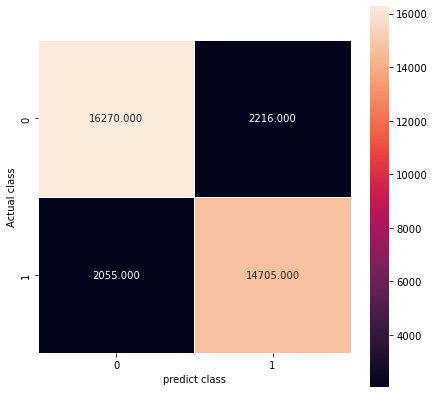

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.20, random_state=48)

# xgb = XGBClassifier(n_estimators = 300, learning_rate = 1, max_depth = 4)
xgb = XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=1, max_delta_step=0,
                                     max_depth=4, min_child_weight=1, monotone_constraints='()',
                                     n_estimators=300, n_jobs=48,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                                     verbosity=None)

evals = [(X_test,Y_test)]
xgb.fit(X_train, Y_train, early_stopping_rounds = 100, eval_metric='logloss', eval_set = evals, verbose=True)

# xgb.fit(X_train, Y_train)

y_pred = xgb.predict(X_test)

accuracy_score(Y_test,y_pred)
print("정확도 : ",accuracy_score(Y_test,y_pred))

conf_mat = confusion_matrix(Y_test,y_pred)
print(confusion_matrix(Y_test,y_pred))

plt.figure(figsize=(7,7))
sns.heatmap(conf_mat, annot = True, fmt=".3f", linewidths=.5,square=True)
plt.ylabel("Actual class")
plt.xlabel("predict class")
plt.show()